In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.shape

(200, 5)

In [32]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df.select_dtypes(include=['object']).keys()

Index(['Genre'], dtype='object')

In [35]:
df_encoded = pd.get_dummies(df,columns=['Genre'])

In [36]:
df_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [45]:
x = df.iloc[:, [3,4]].values 

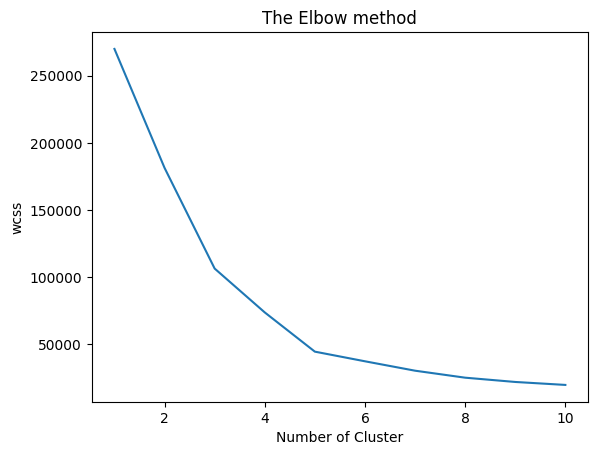

In [46]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0, )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show()

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans

KMeans(n_clusters=5, n_init=10, random_state=0)

In [49]:
y_pred = kmeans.fit_predict(x)

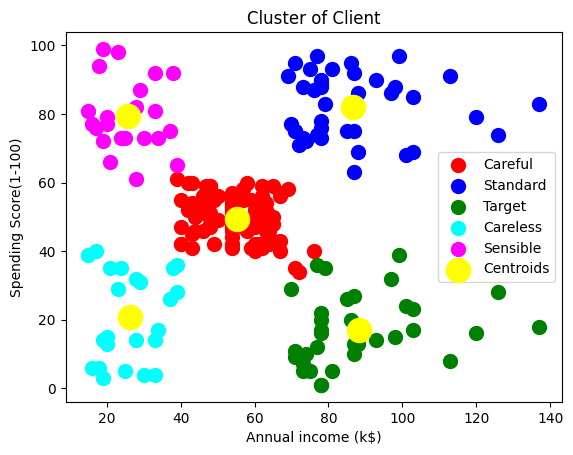

In [50]:
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=100, c='red', label = 'Careful')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=100, c='blue', label = 'Standard')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=100, c='green', label = 'Target')
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s=100, c='cyan', label = 'Careless')
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s=100, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=300, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()